# Installing the required Libraries

In [ ]:
!pip install diffusers transformers accelerate safetensors
!pip install xformers


# Importing the Libraries and Packages

In [2]:
from diffusers import StableDiffusionControlNetImg2ImgPipeline, ControlNetModel, UniPCMultistepScheduler
from diffusers.utils import load_image
import torch
import PIL.Image
import requests
from io import BytesIO


#Setting up the ControlNet Model with Stable Diffusion V1-5 Model as into Pipeline

In [3]:
controlnet = ControlNetModel.from_pretrained(
    "lllyasviel/sd-controlnet-canny",
    torch_dtype=torch.float16
)

pipe = StableDiffusionControlNetImg2ImgPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    controlnet=controlnet,
    safety_checker=None,
    torch_dtype=torch.float16
)

pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)
pipe.to("cuda")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:104: UserWarning: 
Error while fetching `HF_TOKEN` secret value from your vault: 'Requesting secret HF_TOKEN timed out. Secrets can only be fetched when running from the Colab UI.'.
You are not authenticated with the Hugging Face Hub in this notebook.
If the error persists, please let us know by opening an issue on GitHub (https://github.com/huggingface/huggingface_hub/issues/new).
  warnings.warn(


config.json:   0%|          | 0.00/920 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.45G [00:00<?, ?B/s]

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'diffusers.pipelines.controlnet.pipeline_controlnet_img2img.StableDiffusionControlNetImg2ImgPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


StableDiffusionControlNetImg2ImgPipeline {
  "_class_name": "StableDiffusionControlNetImg2ImgPipeline",
  "_diffusers_version": "0.32.2",
  "_name_or_path": "runwayml/stable-diffusion-v1-5",
  "controlnet": [
    "diffusers",
    "ControlNetModel"
  ],
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    null,
    null
  ],
  "scheduler": [
    "diffusers",
    "UniPCMultistepScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

Saving GANESH.JPG to GANESH.JPG


# Utilizing OpenCV for Image Processing with Upload Feature to the Google Colab Environment

Saving should-you-quit-work-after-having-kids.webp to should-you-quit-work-after-having-kids.webp


  0%|          | 0/24 [00:00<?, ?it/s]

Saved as: Cartoon_should-you-quit-work-after-having-kids.png


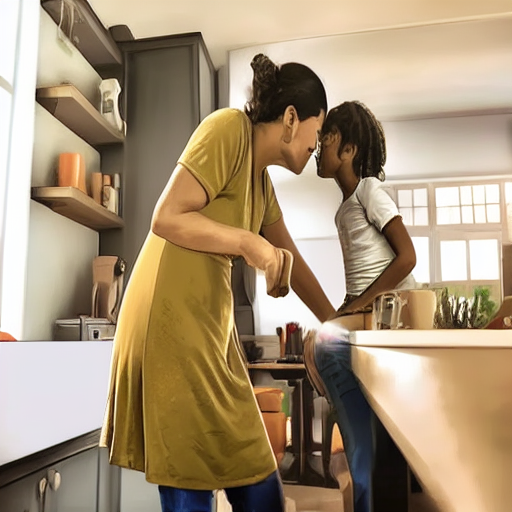

In [14]:
from google.colab import files
uploaded = files.upload()

from PIL import Image
import cv2
import numpy as np

# Load and resize input image
input_path = list(uploaded.keys())[0]
original_image = Image.open(input_path).convert("RGB")
original_image = original_image.resize((512, 512))

# Generate canny edge map for ControlNet
def get_canny(image):
    image = np.array(image)
    image = cv2.Canny(image, 100, 200)
    image = image[:, :, None]
    image = np.concatenate([image] * 3, axis=2)
    return Image.fromarray(image)


canny_image = get_canny(original_image)
prompt = "Create a Cartoon version of the given image. Make sure the quality of image is good"
result = pipe(prompt=prompt, image=original_image, control_image=canny_image, num_inference_steps=30)


import os

# Get original uploaded filename
original_filename = os.path.basename(input_path)  # e.g., "myphoto.jpg"
base_name, ext = os.path.splitext(original_filename)  # ("myphoto", ".jpg")

# Create new filename
output_filename = f"Cartoon_{base_name}.png"

# Save image
result.images[0].save(output_filename)

# Display and confirm saved name
print(f"Saved as: {output_filename}")


# result.images[0].save("cartoonized_output.png")
# result.images[0].show()
from IPython.display import display
display(result.images[0])
